# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [1]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.reporting.figures import PortfolioPlot
from surfingcrypto.reporting.figures import CalendarPlot

import pandas as pd

In [2]:
c = Config("/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")



In [3]:
p = Portfolio("coinbase", configuration=c)



### PORTFOLIO 
MyCoinbase( isHistoric:True, N_accounts:32)
Warning! There are 14 transactionsthat were EXCLUDED in std_df.
Warning! Errors while handling transactions:
TransactionsHistory(Transactions:203 - Processed:203, Unhandled:0 - Errors:9)


In [4]:
p.coinbase.active_accounts


['DOGE', 'SOL', 'MATIC', 'USDC']

In [5]:
p.std_df.head()


,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,trade_id
datetime,,,,,,,,,,
2018-10-22T06:29:22Z,buy,0.017237,BTC,100.00,EUR,100.00,97.01,2.99,5627.999719,None
2018-11-09T12:05:12Z,sell,0.017237,BTC,93.27,EUR,93.27,96.26,2.99,5584.488743,None
2018-11-09T12:06:14Z,buy,348.021666,BAT,93.27,EUR,93.27,90.28,2.99,0.259409,None
2019-01-25T14:28:56Z,sell,348.021666,BAT,35.96,EUR,35.96,37.95,1.99,0.109045,None
2021-04-20T18:57:40Z,buy,0.258429,ETH,500.00,EUR,500.00,492.66,7.34,1906.364408,None


## Total fees

In [6]:
p.total_fees()


221.59999999999988

## Portfolio total investment`

Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [7]:
p.total_investment()



,amount
type,
fiat_deposit,1050.00
fiat_withdrawal,-35.96


## Portfolio value tracker

In [8]:
p.start_tracker(
    stocks_start="1-1-2021", benchmark="ETH",
)



### Closedata

`Tracker` uses locally stored closedata to track the portfolio daily values.

In [9]:
p.tracker.closedata.tail()


,Date,Close,symbol
12790,2022-04-13 00:00:00+00:00,0.128570,DOGE
12791,2022-04-14 00:00:00+00:00,0.132988,DOGE
12792,2022-04-15 00:00:00+00:00,0.135061,DOGE
12793,2022-04-16 00:00:00+00:00,0.132920,DOGE
12794,2022-04-17 00:00:00+00:00,0.128967,DOGE


The  `error_log` attributes contains the log from loading data.

In [10]:
p.tracker.error_log


[]

### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [11]:
p.tracker.active_positions.head()


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408
5,2021-04-22 10:13:53+00:00,buy,0.062128,MKR,250.00,3964.873854
6,2021-04-22 19:20:15+00:00,sell,0.062128,MKR,213.69,3491.496921
7,2021-04-24 08:53:47+00:00,buy,210.343863,ADA,213.69,1.000980
8,2021-04-25 16:15:33+00:00,buy,0.350116,CGLD,1.65,4.712730


### Portfolio calculations

All `daily_snapshots` are concatenated in a single dataframe, where for each row the following new attributes are calculated:

- Symbol Adj Close	    
- Adj cost daily	
- Benchmark Close	
- Benchmark DayOfBuy Close	
- Benchmark Equiv Shares	
- Benchmark Adj Cost Daily	
- symbol Return	
- Stock Gain / (Loss)	
- Benchmark Return	
- Benchmark Gain / (Loss)

In [12]:
p.tracker.daily_calcs

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
0,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-20 00:00:00+00:00,1936.596366,500.472817,1936.596366,1936.596366,0.258185,500.000000,0.015858,7.812817,0.000000,0.000000
1,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-21 00:00:00+00:00,1964.593249,507.708026,1964.593249,1936.596366,0.258185,507.228373,0.030544,15.048026,0.014457,7.228373
2,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-22 00:00:00+00:00,2000.536891,516.996908,2000.536891,1936.596366,0.258185,516.508480,0.049399,24.336908,0.033017,16.508480
3,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-23 00:00:00+00:00,1953.619811,504.872170,1953.619811,1936.596366,0.258185,504.395197,0.024788,12.212170,0.008790,4.395197
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-24 00:00:00+00:00,1828.220570,472.465360,1828.220570,1936.596366,0.258185,472.019002,-0.040991,-20.194640,-0.055962,-27.980998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,2022-04-13 22:45:23+00:00,buy,4693.928869,DOGE,604.11,0.128700,2022-04-16 00:00:00+00:00,0.132920,623.918862,2832.352308,2862.116169,0.211071,597.827709,0.032790,19.808862,-0.010399,-6.282291
1792,2022-04-11 21:35:11+00:00,buy,0.006639,USDC,143.41,0.918329,2022-04-17 00:00:00+00:00,0.924084,0.006135,2768.209553,2740.696028,0.052326,144.849676,0.006267,0.000038,0.010039,1.439676
1793,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,2022-04-17 00:00:00+00:00,1.239260,319.518181,2768.209553,2637.787884,0.515830,1427.925404,0.055449,16.786267,0.049444,67.275404
1794,2022-04-13 21:13:35+00:00,buy,1.228168,SOL,118.00,96.078047,2022-04-17 00:00:00+00:00,92.855875,114.042630,2768.209553,2862.116169,0.041228,114.128396,-0.033537,-3.957370,-0.032810,-3.871604


### Daily snapshots

The module produces daily snapshots of the portfolio balance.
Each day can be accessed by selecting via the `Date Snapshot` column.


In [13]:
p.tracker.daily_snaphost("last")


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
Date Snapshot,,,,,,,,,,,,,,,,
2022-04-17 00:00:00+00:00,2022-04-11 21:35:11+00:00,buy,0.006639,USDC,143.41,0.918329,0.924084,0.006135,2768.209553,2740.696028,0.052326,144.849676,0.006267,0.000038,0.010039,1.439676
2022-04-17 00:00:00+00:00,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,1.239260,319.518181,2768.209553,2637.787884,0.515830,1427.925404,0.055449,16.786267,0.049444,67.275404
2022-04-17 00:00:00+00:00,2022-04-13 21:13:35+00:00,buy,1.228168,SOL,118.00,96.078047,92.855875,114.042630,2768.209553,2862.116169,0.041228,114.128396,-0.033537,-3.957370,-0.032810,-3.871604
2022-04-17 00:00:00+00:00,2022-04-13 22:45:23+00:00,buy,4693.928869,DOGE,604.11,0.128700,0.128967,605.364206,2768.209553,2862.116169,0.211071,584.289028,0.002076,1.254206,-0.032810,-19.820972


### Daily grouped metrics

The `daily_grouped_metrics()` method can be used to extract from the `daily_calcs` dataframe a single grouped timeseries of a selecred set of variables.

In [14]:
p.tracker.daily_grouped_metrics(["Adj cost daily"]).tail()



variable,Adj cost daily
Date Snapshot,
2022-04-13,1057.929723
2022-04-14,1065.558023
2022-04-15,1082.056010
2022-04-16,1071.776866
2022-04-17,1038.931152


By default all different assets are summed together, otherwise it is possible to keep data separated by simbol, with `by_simbol` set as `True`.

In [15]:
p.tracker.daily_grouped_metrics(["Adj cost daily"], by_symbol=True).iloc[-5:].dropna(
    axis=1
)



Symbol,DOGE,MATIC,SOL,USDC
variable,Adj cost daily,Adj cost daily,Adj cost daily,Adj cost daily
Date Snapshot,,,,
2022-04-13,603.499777,336.060193,118.363661,0.006092
2022-04-14,624.235972,327.024998,114.290919,0.006134
2022-04-15,633.965278,333.002630,115.081963,0.006139
2022-04-16,623.918862,331.693553,116.158309,0.006142
2022-04-17,605.364206,319.518181,114.042630,0.006135


Since `variables` is a list, we can compare multiple attributes.

In [16]:
df = p.tracker.daily_grouped_metrics(
    ["Benchmark Gain / (Loss)", "Stock Gain / (Loss)"], by_symbol=True
)
df.tail()


Symbol                           AAVE                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-13                        NaN                 NaN   
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   

Symbol                            ACH                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-13                        NaN                 NaN   
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   

Symbol                            ADA                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-13                        NaN                 NaN   
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   

Symbol                           ALGO                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-13                        NaN                 NaN   
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   

Symbol                            AMP                      ...  \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)  ...   
Date Snapshot                                              ...   
2022-04-13                        NaN                 NaN  ...   
2022-04-14                        NaN                 NaN  ...   
2022-04-15                        NaN                 NaN  ...   
2022-04-16                        NaN                 NaN  ...   
2022-04-17                        NaN                 NaN  ...   

Symbol                            SOL                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-13                   0.000000            0.363661   
2022-04-14                  -2.951900           -3.709081   
2022-04-15                  -2.042907           -2.918037   
2022-04-16                  -1.227111           -1.841691   
2022-04-17                  -3.871604           -3.957370   

Symbol                          SUSHI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-13                        NaN                 NaN   
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   

Symbol                            UNI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-13                        NaN                 NaN   
2022-04-14                        NaN                 NaN   
2022-04-15                        NaN                 NaN   
2022-04-16                        NaN                 NaN   
2022-04-17                        NaN                 NaN   

Symbol                           USDC           

## Portfolio figures

The `surfingcrypto.reporting.figures` modules containes a custom `PortfolioPlot` class that is designed to plot figures for the stock calculation, as *Adj cost daily*  or *Stock Gain / (Loss)*.

Data can be selected by passing the `variable` - and optionally `by_symbol`-  as to a `daily_grouped_metrics()` function. 

Moreover, with `zero_line`as `True` it is possible to add an horizontal line at 0.
### Portfolio daily value 

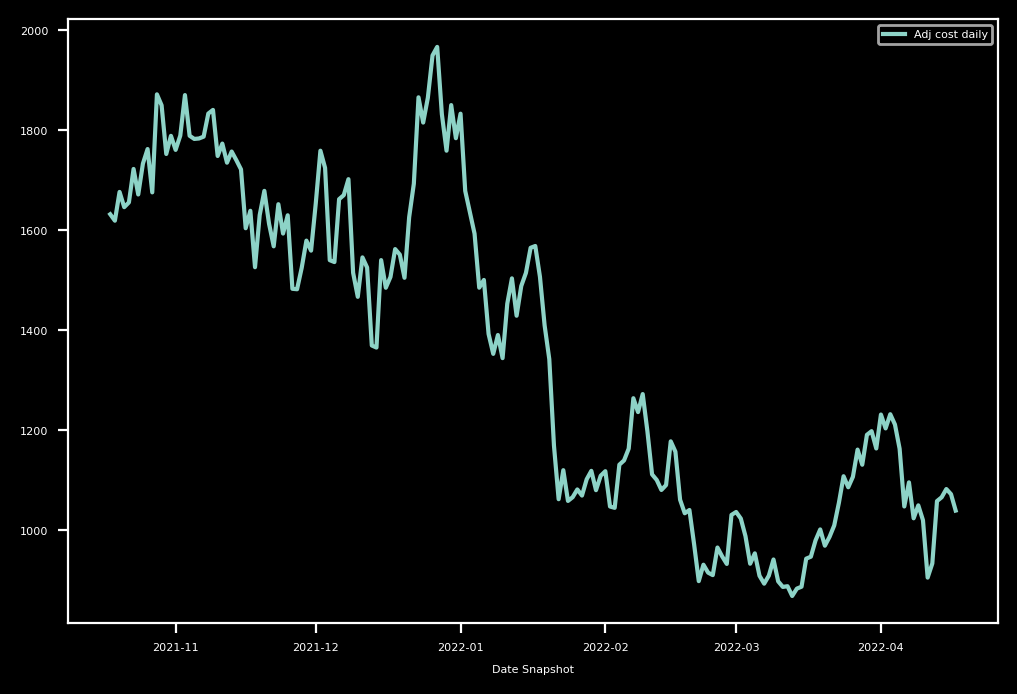

In [17]:
PortfolioPlot(variables=["Adj cost daily"], object=p, graphstart="6m")



### Portfolio gain/loss

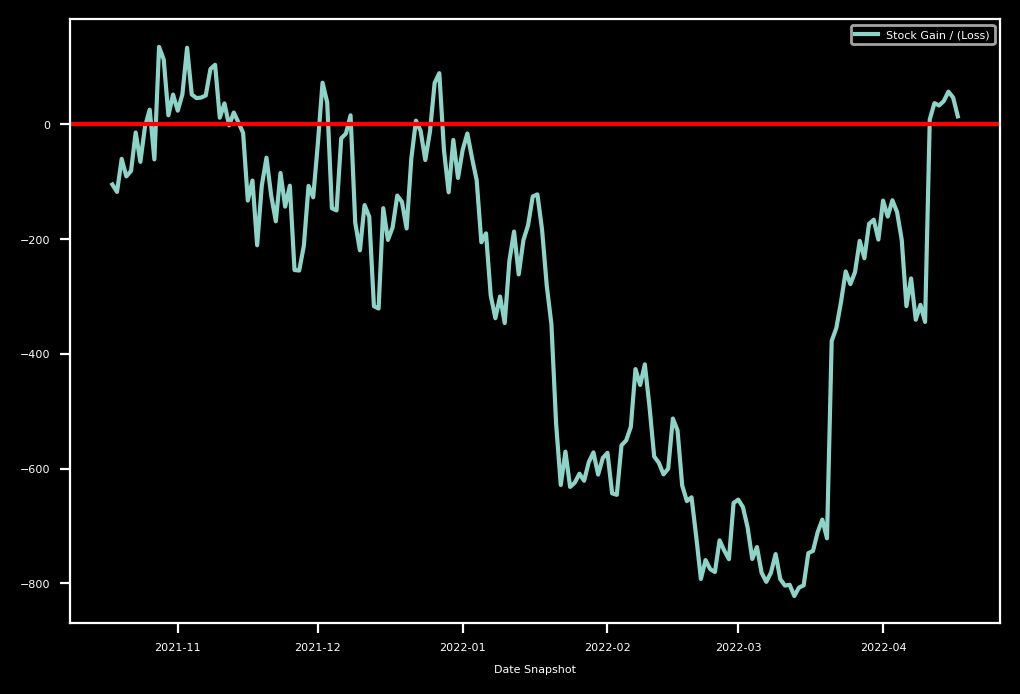

In [18]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)"],
    zero_line=True,
    object=p,
    graphstart="6m",
)



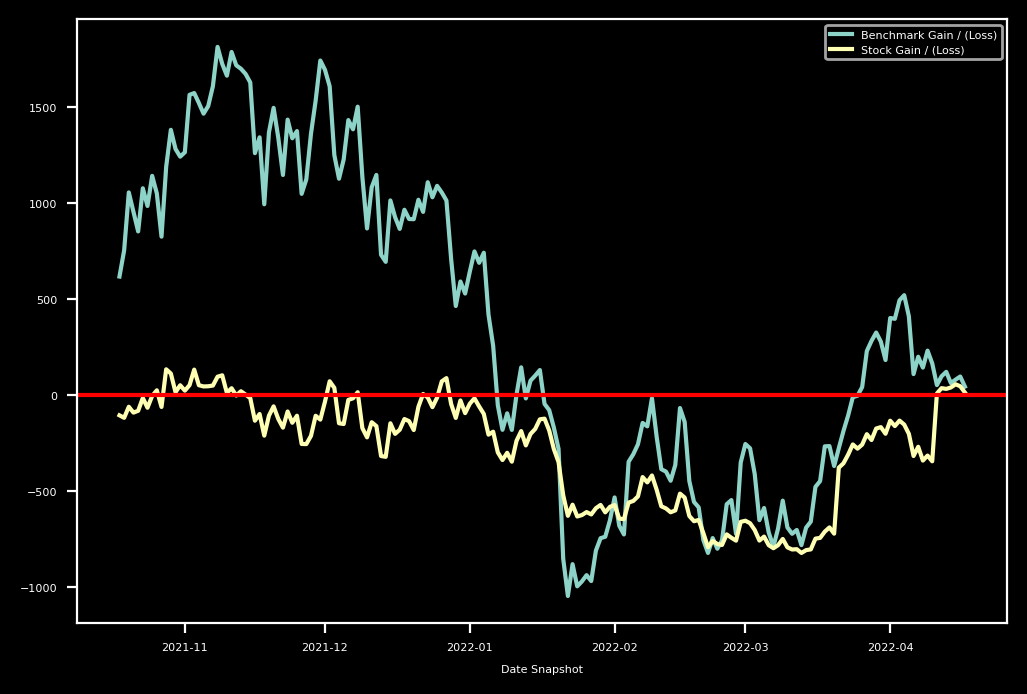

In [19]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)", "Benchmark Gain / (Loss)"],
    zero_line=True,
    object=p,
    graphstart="6m",
)



### Portfolio daily value by symbol


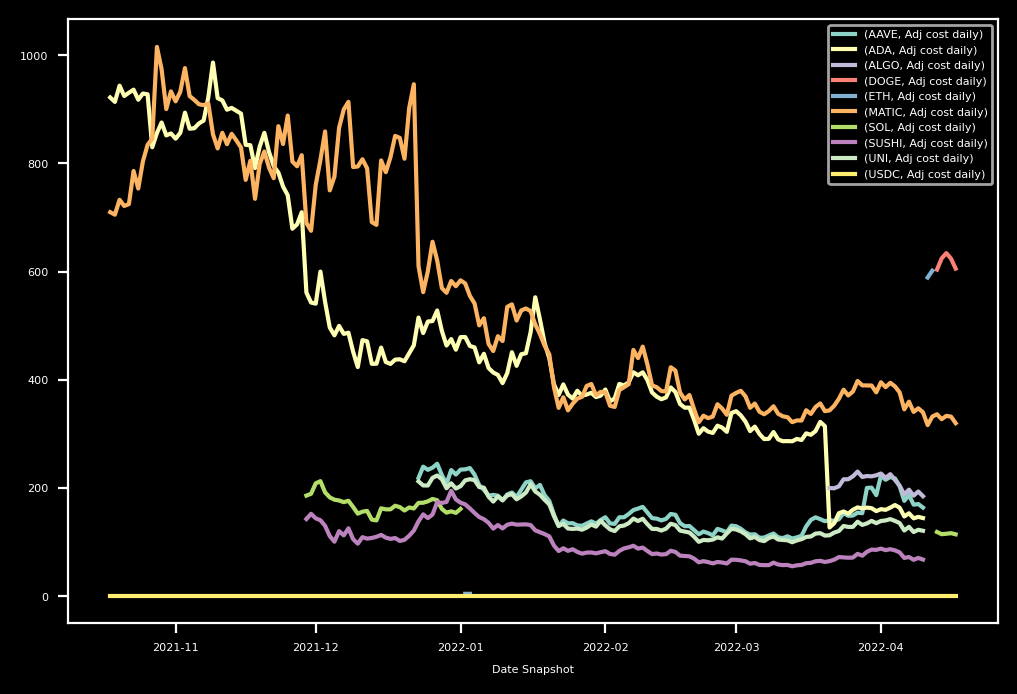

In [20]:
PortfolioPlot(
    variables=["Adj cost daily"], by_symbol=True, object=p, graphstart="6m"
)



### Stock gain by symbol

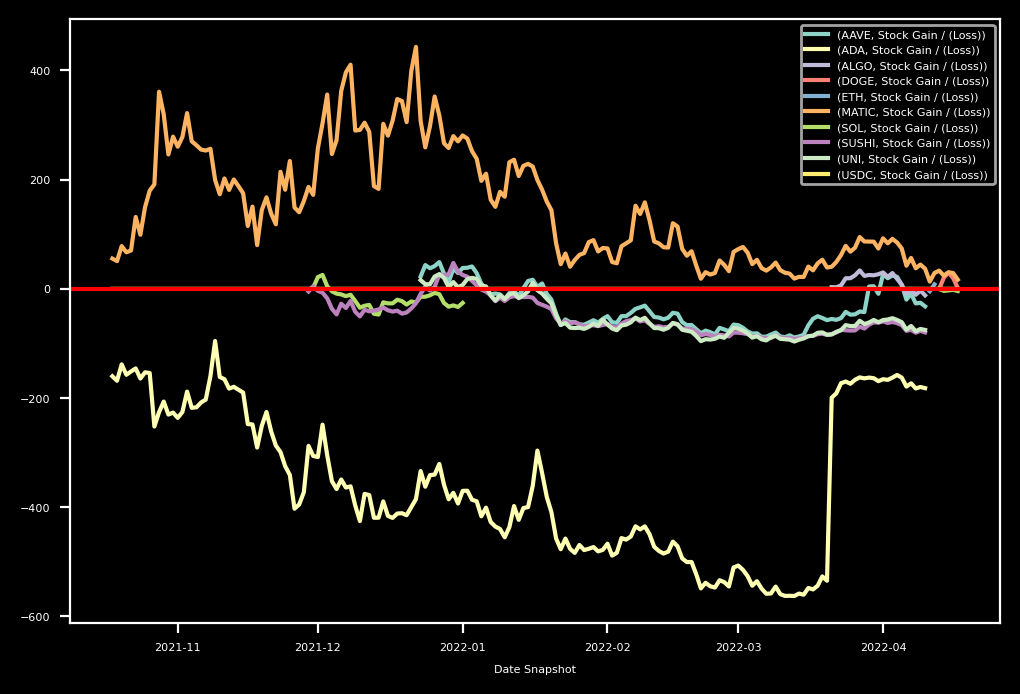

In [21]:
PortfolioPlot(
    variables=["Stock Gain / (Loss)"],
    by_symbol=True,
    zero_line=True,
    object=p,
    graphstart="6m",
)


## Calendar plot

This calendar plot is a good visualisation of a variable in a calendar style.

The series passed as input must have a datetime index.


In [22]:
values = p.tracker.daily_grouped_metrics(["Stock Gain / (Loss)"])
values.index = pd.to_datetime(values.index)
values = values.reset_index().set_index("Date Snapshot")
values

variable,Stock Gain / (Loss)
Date Snapshot,
2021-04-20,7.812817
2021-04-21,15.048026
2021-04-22,24.336908
2021-04-23,12.212170
2021-04-24,-39.242299
...,...
2022-04-13,33.081713
2022-04-14,40.710013
2022-04-15,57.208000


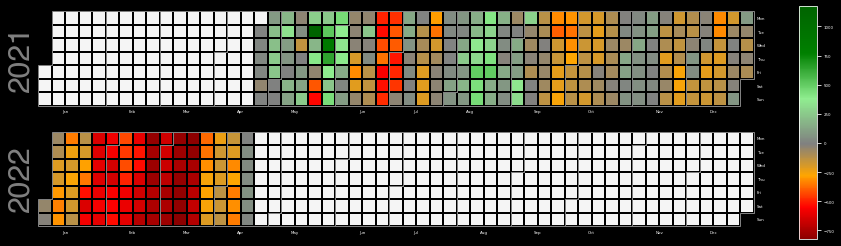

In [23]:
CalendarPlot(values=values)